In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [18]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [19]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
#latest_date
print(f"latest date: {latest_date} ")

year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f"Date one year ago: {year_ago}")


latest date: ('2017-08-23',) 
Date one year ago: 2016-08-23


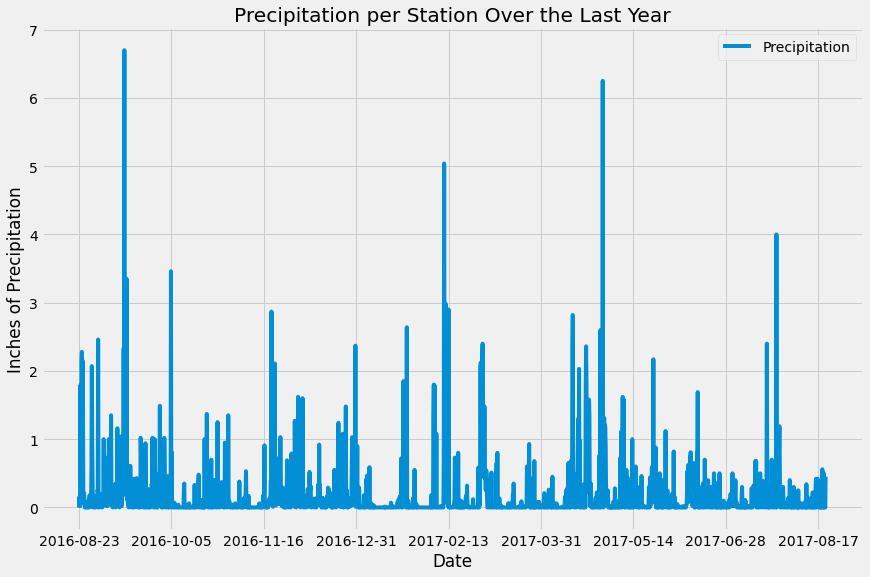

In [36]:
# Perform a query to retrieve the data and precipitation scores
annual_pcpn = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago, measurement.prcp !=None).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(annual_pcpn, columns=["Date", "Precipitation"])
df.set_index('Date', inplace=True)
# Sort the dataframe by date
df_date = df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
df_date.plot(figsize=(12,8))
plt.tight_layout()
plt.title("Precipitation per Station Over the Last Year")
plt.ylabel('Inches of Precipitation')
plt.show()



In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_date.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number stations in the dataset
session.query(measurement.station).distinct().count()

9

In [30]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temp = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').order_by(func.min(measurement.tobs)).all()
print(f"min, max, and avg temp for station USC00519281: {station_temp}")

min, max, and avg temp for station USC00519281: [(54.0, 85.0, 71.66378066378067)]


In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_year = session.query(measurement.tobs).filter(measurement.date >= year_ago, measurement.station == 'USC00519281').\
    order_by(measurement.tobs).all()

In [34]:
df2 = pd.DataFrame(station_year, columns=['Tobs'])
df2

,Tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0
...,...
347,81.0
348,82.0
349,82.0
350,82.0


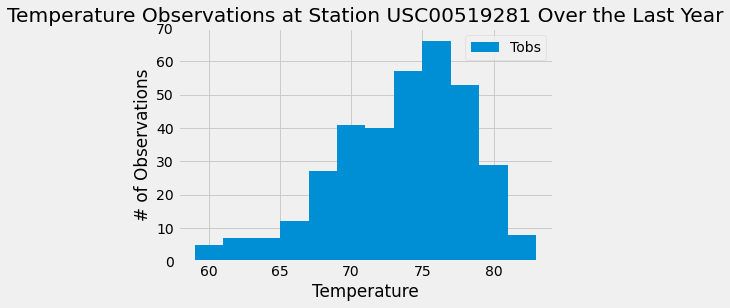

In [35]:
bins = 12
df2.plot.hist(station_year,bins)
plt.ylim(0,70)
plt.title("Temperature Observations at Station USC00519281 Over the Last Year")
plt.ylabel("# of Observations")
plt.xlabel("Temperature")
plt.show()

# Close session

In [37]:
# Close Session
session.close()